<a href="https://colab.research.google.com/github/yweslakarep123/tugas_siskon/blob/main/sistem_kontrol2_PID_Ziegler_Nichols_PID_Pole_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install control

<TransferFunction>: sys[94]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  s^5 + 3 s^4 - 3 s^3 - 7 s^2 + 6 s
-------------------------------------
s^5 + 3 s^4 - 3 s^3 - 6 s^2 + 3 s - 4



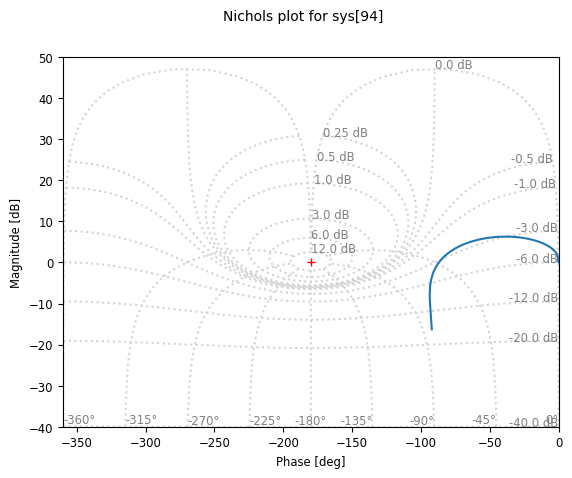

In [10]:
#Nomor 2A Ziegler Nichols
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# plant and controller transfer functions
s = ctrl.TransferFunction.s
Gp=s/(s-4)*(s-1)
Gc=(s+2)*(s+3)/(s+1)*(s-1)

# closed loop transfer function
G=Gc*Gp/(1+Gp*Gc)
G=G.minreal()

print(G)

out1 = ctrl.nichols_plot(G)
plt.show()

0 states have been removed from the model
<TransferFunction>: sys[106]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  s^3 + 6.667 s^2 + 22.68 s
-----------------------------
s^3 + 7.667 s^2 + 17.68 s + 4

Poles of the closed loop system: [-3.70674111+1.43486198j -3.70674111-1.43486198j -0.25318445+0.j        ]
Zeros of the closed loop system: [-3.33333333+3.4006802j -3.33333333-3.4006802j  0.        +0.j       ]


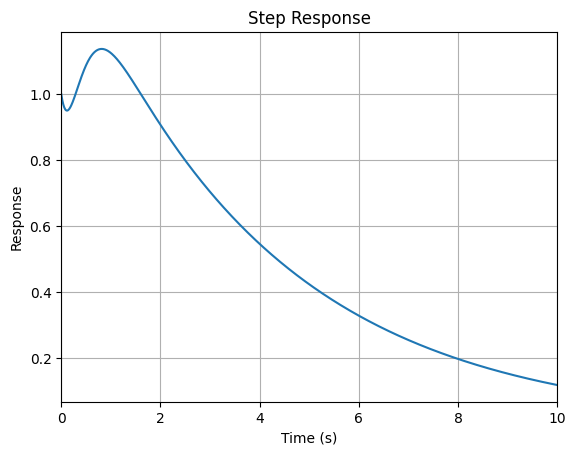

In [11]:
#Nomor 2B Pole placement
import matplotlib.pyplot as plt
import control as ctrl
import numpy as np

# plant transfer function
s = ctrl.TransferFunction.s
Gp = s / ((s - 4) * (s - 1))

# desired damping ratio and settling time
zeta = 0.7
Ts = 1.2

# natural frequency calculation based on settling time
wn = 4 / (zeta * Ts)

# desired characteristic polynomial (second order)
desired_char_poly = [1, 2*zeta*wn, wn**2]

# closed loop transfer function with unity feedback
Gc = ctrl.TransferFunction(desired_char_poly, [1])

# closed loop system
G_closed_loop = ctrl.feedback(Gc * Gp, 1)

# minimal realization to simplify the transfer function
G_closed_loop = ctrl.minreal(G_closed_loop)

print(G_closed_loop)

# time array
time = np.arange(0, 10, 0.01)

# step response
t, y = ctrl.step_response(G_closed_loop, time)

print("Poles of the closed loop system:", G_closed_loop.poles())
print("Zeros of the closed loop system:", G_closed_loop.zeros())

# plot step response
plt.plot(t, y)
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.xlim(0, 10)
plt.grid(True)
plt.show()


0 states have been removed from the model
<TransferFunction>: sys[123]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


s^5 + 10.67 s^4 + 50.34 s^3 + 91.37 s^2 - 17.32 s - 136.1
---------------------------------------------------------
s^5 + 10.67 s^4 + 50.34 s^3 + 91.37 s^2 - 16.32 s - 135.1

Poles of the closed loop system: [-3.33955478+3.39439159j -3.33955478-3.39439159j -2.95581583+0.j
 -2.02623726+0.j          0.99449598+0.j        ]
Zeros of the closed loop system: [-3.33333333+3.4006802j -3.33333333-3.4006802j -3.        +0.j
 -2.        +0.j         1.        +0.j       ]


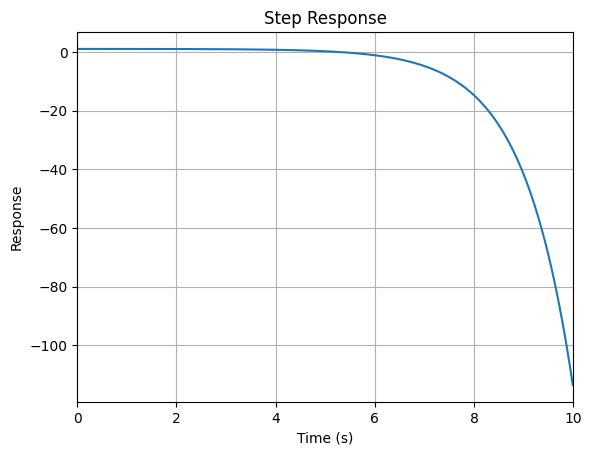

In [12]:
import matplotlib.pyplot as plt
import control as ctrl
import numpy as np

# plant transfer function
s = ctrl.TransferFunction.s
Gp = (s+2)*(s+3)/(s+1)*(s-1)

# desired damping ratio and settling time
zeta = 0.7
Ts = 1.2

# natural frequency calculation based on settling time
wn = 4 / (zeta * Ts)

# desired characteristic polynomial (second order)
desired_char_poly = [1, 2*zeta*wn, wn**2]

# closed loop transfer function with unity feedback
Gc = ctrl.TransferFunction(desired_char_poly, [1])

# closed loop system
G_closed_loop = ctrl.feedback(Gc * Gp, 1)

# minimal realization to simplify the transfer function
G_closed_loop = ctrl.minreal(G_closed_loop)

print(G_closed_loop)

# time array
time = np.arange(0, 10, 0.01)

# step response
t, y = ctrl.step_response(G_closed_loop, time)

print("Poles of the closed loop system:", G_closed_loop.poles())
print("Zeros of the closed loop system:", G_closed_loop.zeros())

# plot step response
plt.plot(t, y)
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.xlim(0, 10)
plt.grid(True)
plt.show()
